In [ ]:
from IPython.display import clear_output

!pip install transformers tokenizers

clear_output()

In [ ]:
import os
import pandas as pd
import numpy as np

from tokenizers import Tokenizer
from tokenizers.models import BPE, WordPiece
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import BpeTrainer, WordPieceTrainer
from transformers import PreTrainedTokenizerFast
from easydict import EasyDict
import yaml

In [ ]:
os.environ["TOKENIZERS_PARALLELISM"] = "true"
SPECIAL_TOKENS = ["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"]

In [ ]:
text_data = []
cnt = 0

for file in os.listdir('./tok/'):
    if file.endswith('.csv'):
        if cnt < 3:
          cnt += 1
          file_path = os.path.join('./tok/', file)
          df = pd.read_csv(file_path, encoding = "CP949")
          text_data.extend(df['발화문'].tolist())
        else:
          cnt += 1
          file_path = os.path.join('./tok/', file)
          df = pd.read_csv(file_path, index_col = 'Unnamed: 0')
          text_data.extend(df['sentence'].tolist())

In [ ]:
text_data[:3]

['헐! 나 이벤트에 당첨 됐어.',
 '내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.',
 '한 명 뽑는 거였는데, 그게 바로 내가 된 거야.']

In [ ]:
len(text_data)

308782

In [ ]:
tokenizer_batch_size = 1024

def batch_iterator():
    for i in range(0, len(text_data), tokenizer_batch_size):
        yield text_data[i : i + tokenizer_batch_size]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("monologg/kobert")
tokenizer.is_fast

True

In [ ]:
vocab_size = 4096
new_tokenizer = tokenizer.train_new_from_iterator(batch_iterator(), vocab_size = vocab_size)
new_tokenizer

BertTokenizerFast(name_or_path='monologg/kobert', vocab_size=4096, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
list_input_ids = []

for data in text_data:
    input_id = new_tokenizer(data).input_ids
    list_input_ids.append(len(input_id))

In [ ]:
print("max length: ", max(list_input_ids))

max length:  169


(array([1.8000e+01, 1.0430e+03, 1.7010e+03, 5.1560e+03, 5.2930e+03,
        2.8080e+03, 6.5570e+03, 6.0570e+03, 2.6700e+03, 5.0000e+03,
        4.9370e+03, 2.2040e+03, 4.4750e+03, 4.7640e+03, 2.5680e+03,
        5.4550e+03, 6.3280e+03, 3.5910e+03, 7.8900e+03, 8.9830e+03,
        5.0360e+03, 1.0925e+04, 1.2568e+04, 6.5390e+03, 1.4256e+04,
        1.5251e+04, 7.8530e+03, 1.5548e+04, 1.5581e+04, 7.8900e+03,
        1.4961e+04, 1.3927e+04, 6.7350e+03, 1.2450e+04, 1.0896e+04,
        4.9430e+03, 9.2650e+03, 7.6540e+03, 3.2850e+03, 5.4910e+03,
        4.4320e+03, 1.8570e+03, 3.0020e+03, 2.3640e+03, 9.8000e+02,
        1.5140e+03, 1.2220e+03, 5.5100e+02, 7.9600e+02, 2.8600e+02,
        5.7400e+02, 4.2900e+02, 1.5800e+02, 2.6500e+02, 2.4200e+02,
        1.1700e+02, 1.7900e+02, 1.6200e+02, 5.3000e+01, 1.0800e+02,
        7.8000e+01, 4.0000e+01, 6.2000e+01, 6.0000e+01, 2.2000e+01,
        5.8000e+01, 6.2000e+01, 3.7000e+01, 6.1000e+01, 3.0000e+01,
        8.0000e+00, 2.4000e+01, 3.2000e+01, 7.00

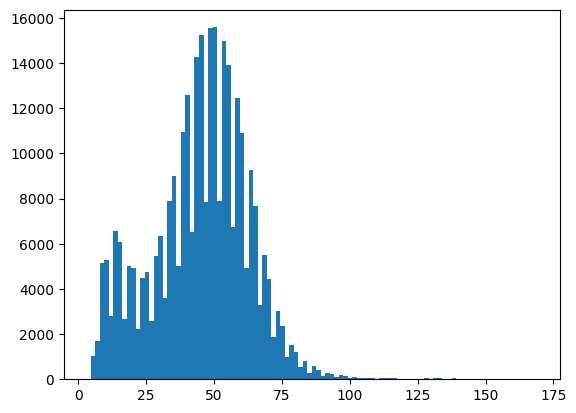

In [ ]:
import matplotlib.pyplot as plt

plt.hist(list_input_ids, bins=100)

In [ ]:
len(new_tokenizer.vocab)

4096

In [ ]:
new_tokenizer.save_pretrained("./tokenizer/sentiment_tokenizer.json")

('./tokenizer/sentiment_tokenizer.json/tokenizer_config.json',
 './tokenizer/sentiment_tokenizer.json/special_tokens_map.json',
 './tokenizer/sentiment_tokenizer.json/vocab.txt',
 './tokenizer/sentiment_tokenizer.json/added_tokens.json',
 './tokenizer/sentiment_tokenizer.json/tokenizer.json')

In [ ]:
import numpy as np

np.mean(list_input_ids), np.std(list_input_ids)

(45.09303003413412, 18.10459639440694)

In [ ]:
import numpy as np

np.quantile(list_input_ids, 0.75)

57.0

In [ ]:
!pip install huggingface

In [ ]:
new_tokenizer.push_to_hub("a2ran/sent_cognition", use_auth_token = True)

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:844: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


CommitInfo(commit_url='https://huggingface.co/a2ran/sent_cognition/commit/5006e6f431b265c2341628cbd90eafd5aa436096', commit_message='Upload tokenizer', commit_description='', oid='5006e6f431b265c2341628cbd90eafd5aa436096', pr_url=None, pr_revision=None, pr_num=None)